<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/CLASSIFICATION_WITH_DIFFERENT_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00


**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Load data**

In [ ]:
data=pd.read_csv('/content/car acceptability.csv')

**Data Information, cleaning and transformtaion**

In [ ]:
data.head()

Buying_Price Maintenance_Price No_of_Doors Person_Capacity Size_of_Luggage  \
0        vhigh             vhigh           2               2           small   
1        vhigh             vhigh           2               2           small   
2        vhigh             vhigh           2               2           small   
3        vhigh             vhigh           2               2             med   
4        vhigh             vhigh           2               2             med   

  Safety Car_Acceptability  
0    low             unacc  
1    med             unacc  
2   high             unacc  
3    low             unacc  
4    med             unacc

In [ ]:
data.shape

(1728, 7)

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [Buying_Price, Maintenance_Price, No_of_Doors, Person_Capacity, Size_of_Luggage, Safety, Car_Acceptability]
Index: []

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data['Buying_Price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data['Maintenance_Price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data['No_of_Doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
data['Person_Capacity'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
data['Size_of_Luggage'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
data['Safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
data['Car_Acceptability'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
data['Buying_Price'].value_counts(),data['Maintenance_Price'].value_counts(),data['No_of_Doors'].value_counts(),data['Person_Capacity'].value_counts(),data['Size_of_Luggage'].value_counts(),data['Safety'].value_counts(),data['Car_Acceptability'].value_counts()

(vhigh    432
 high     432
 med      432
 low      432
 Name: Buying_Price, dtype: int64,
 vhigh    432
 high     432
 med      432
 low      432
 Name: Maintenance_Price, dtype: int64,
 2        432
 3        432
 4        432
 5more    432
 Name: No_of_Doors, dtype: int64,
 2       576
 4       576
 more    576
 Name: Person_Capacity, dtype: int64,
 small    576
 med      576
 big      576
 Name: Size_of_Luggage, dtype: int64,
 low     576
 med     576
 high    576
 Name: Safety, dtype: int64,
 unacc    1210
 acc       384
 good       69
 vgood      65
 Name: Car_Acceptability, dtype: int64)

In [ ]:
le = LabelEncoder()

In [ ]:
data['Buying_Price'] = le.fit_transform(data['Buying_Price'])
data['Maintenance_Price'] = le.fit_transform(data['Maintenance_Price'])
data['No_of_Doors'] = le.fit_transform(data['No_of_Doors'])
data['Person_Capacity'] = le.fit_transform(data['Person_Capacity'])
data['Size_of_Luggage'] = le.fit_transform(data['Size_of_Luggage'])
data['Safety'] = le.fit_transform(data['Safety'])
data['Car_Acceptability'] = le.fit_transform(data['Car_Acceptability'])

In [ ]:
data['Buying_Price'].value_counts(),data['Maintenance_Price'].value_counts(),data['No_of_Doors'].value_counts(),data['Person_Capacity'].value_counts(),data['Size_of_Luggage'].value_counts(),data['Safety'].value_counts(),data['Car_Acceptability'].value_counts()

(3    432
 0    432
 2    432
 1    432
 Name: Buying_Price, dtype: int64,
 3    432
 0    432
 2    432
 1    432
 Name: Maintenance_Price, dtype: int64,
 0    432
 1    432
 2    432
 3    432
 Name: No_of_Doors, dtype: int64,
 0    576
 1    576
 2    576
 Name: Person_Capacity, dtype: int64,
 2    576
 1    576
 0    576
 Name: Size_of_Luggage, dtype: int64,
 1    576
 2    576
 0    576
 Name: Safety, dtype: int64,
 2    1210
 0     384
 1      69
 3      65
 Name: Car_Acceptability, dtype: int64)

In [ ]:
data.head(10)

Buying_Price  Maintenance_Price  No_of_Doors  Person_Capacity  \
0             3                  3            0                0   
1             3                  3            0                0   
2             3                  3            0                0   
3             3                  3            0                0   
4             3                  3            0                0   
5             3                  3            0                0   
6             3                  3            0                0   
7             3                  3            0                0   
8             3                  3            0                0   
9             3                  3            0                1   

   Size_of_Luggage  Safety  Car_Acceptability  
0                2       1                  2  
1                2       2                  2  
2                2       0                  2  
3                1       1                  2  
4                1       2                  2  
5                1       0                  2  
6                0       1                  2  
7                0       2                  2  
8                0       0                  2  
9                2       1                  2

<ipython-input-15-4e831be9b64a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Safety'], label='Safety', color = 'blue')
<ipython-input-15-4e831be9b64a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Buying_Price'], label = 'Buying Price', color = 'red')
<ipython-input-15-4e831be

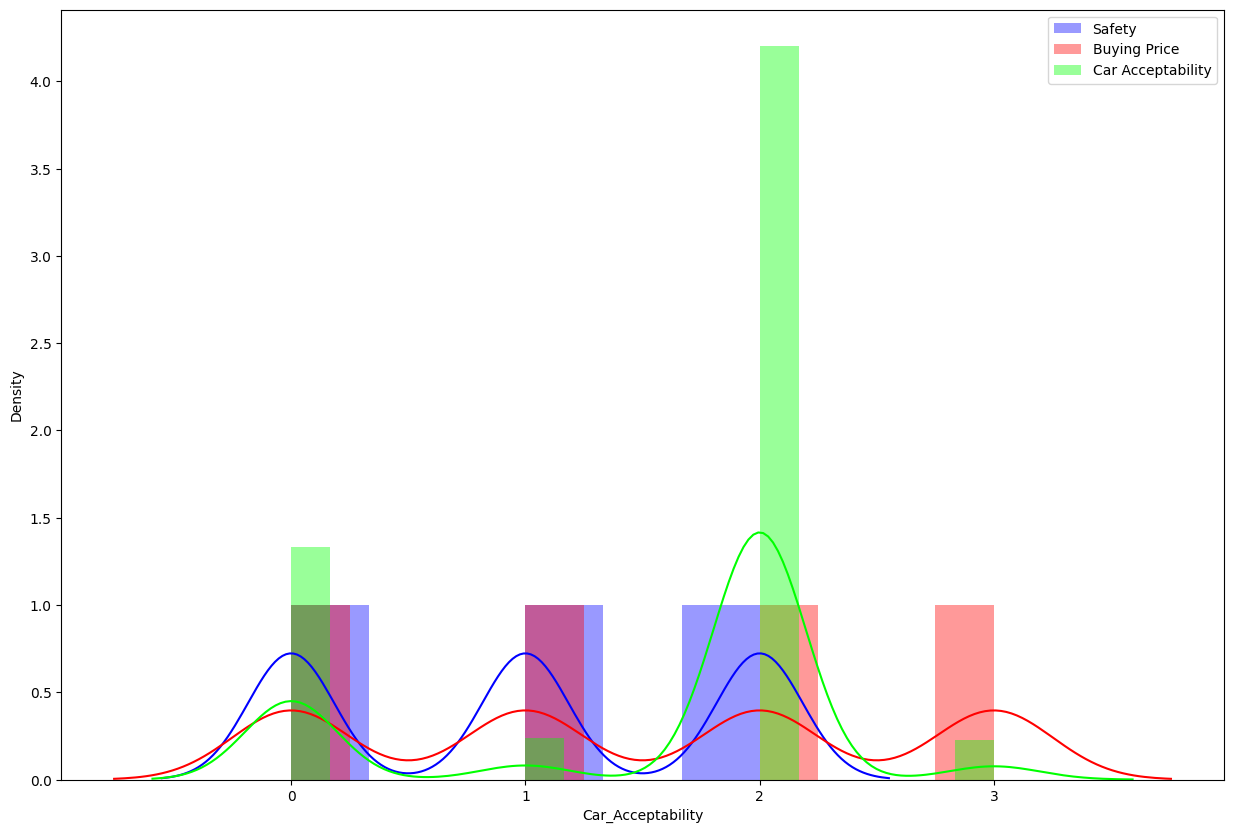

In [ ]:
plt.figure(figsize = (15, 10))
sns.distplot(data['Safety'], label='Safety', color = 'blue')
sns.distplot(data['Buying_Price'], label = 'Buying Price', color = 'red')
sns.distplot(data['Car_Acceptability'], label = 'Car Acceptability', color = 'lime')
plt.legend()

**splitting features into Independent variables and dependent variable(target variable)**

In [ ]:
x=data.iloc[:,:6]
y=data['Car_Acceptability']

**Splitting into train and test data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Creating a function to display all scores,classification report and confusion matrix**

**LOGISTIC REGRESSION**

In [ ]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.6502890173410405
Recall:  0.6502890173410405
Accuracy :  0.6502890173410405
              precision    recall  f1-score   support

           0       0.26      0.11      0.16        79
           1       0.00      0.00      0.00        17
           2       0.71      0.89      0.79       240
           3       0.22      0.20      0.21        10

    accuracy                           0.65       346
   macro avg       0.30      0.30      0.29       346
weighted avg       0.56      0.65      0.59       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


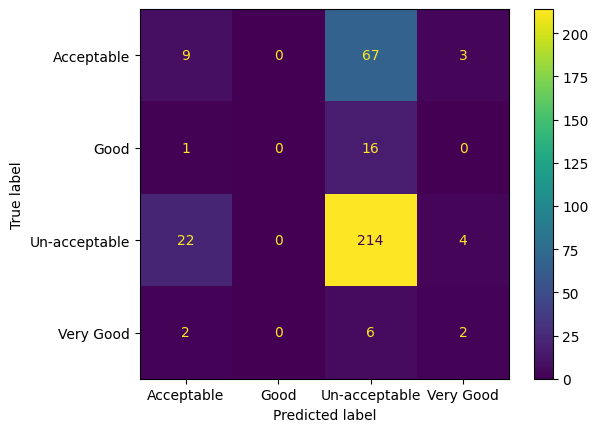

In [ ]:
perform(y_pred_lr)

**DECISION TREE**

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=model_dt.predict(x_test)

Precision :  0.976878612716763
Recall:  0.976878612716763
Accuracy :  0.976878612716763
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.81      1.00      0.89        17
           2       0.99      1.00      0.99       240
           3       1.00      0.90      0.95        10

    accuracy                           0.98       346
   macro avg       0.94      0.95      0.95       346
weighted avg       0.98      0.98      0.98       346



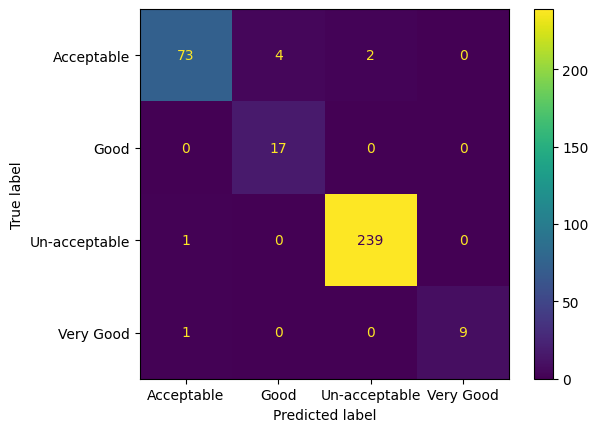

In [ ]:
perform(y_pred_dt)

**Decision Tree Visualization**

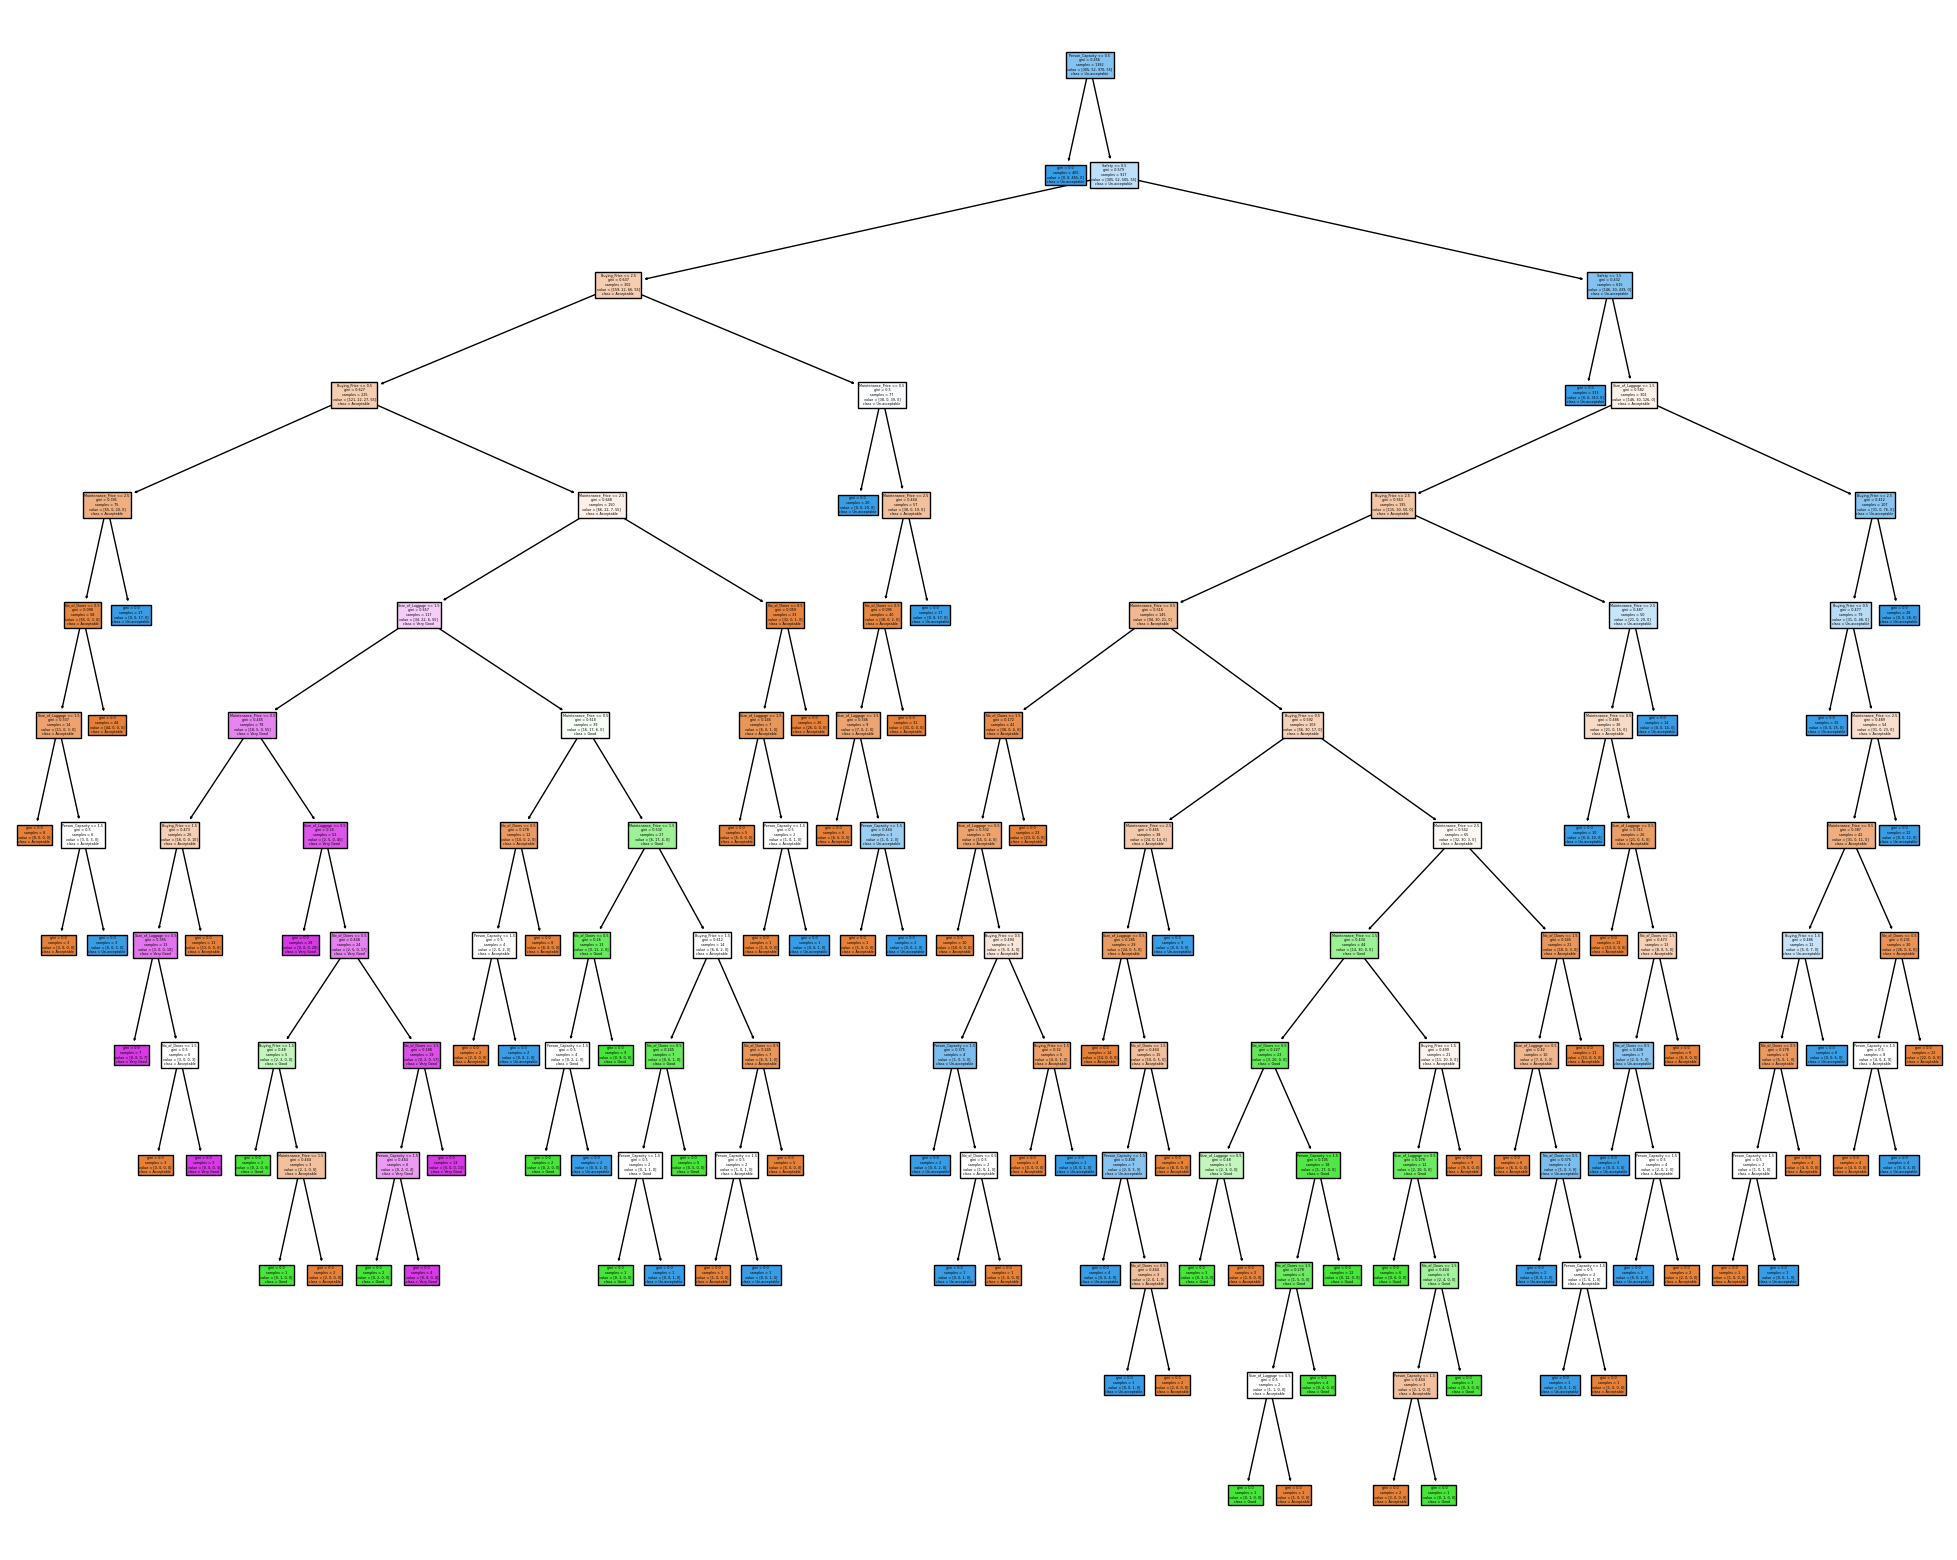

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 20))
plot_tree(model_dt,feature_names=data.columns[0:6],class_names = ['Acceptable', 'Good', 'Un-acceptable', 'Very Good'],filled = True, rounded = False)
plt.savefig('tree_visualization.png')

In [ ]:
import dtreeviz
vizmodel=dtreeviz.model(model_dt,X_train=x_train, y_train=y_train,feature_names=data.columns[0:6],target_name='Car Acceptability',class_names = ['Acceptable', 'Good', 'Un-acceptable', 'Very Good'])
v=vizmodel.view()
v.save("car acceptability dt.svg")

**RANDOM FOREST**

In [ ]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9739884393063584
Recall:  0.9739884393063584
Accuracy :  0.9739884393063584
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        79
           1       0.88      0.88      0.88        17
           2       1.00      0.99      0.99       240
           3       0.82      0.90      0.86        10

    accuracy                           0.97       346
   macro avg       0.91      0.93      0.92       346
weighted avg       0.97      0.97      0.97       346



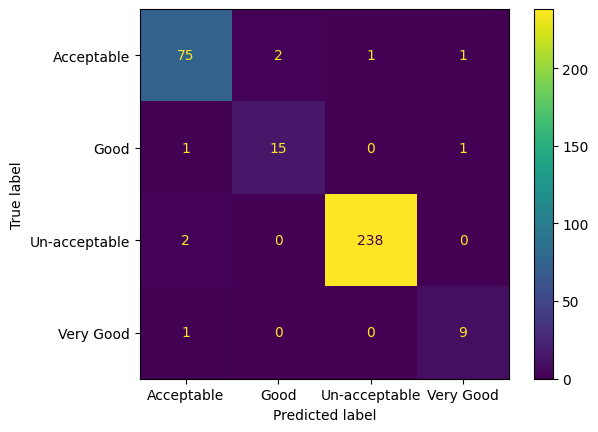

In [ ]:
perform(y_pred_rf)

In [ ]:
estimator = model_rf.estimators_[50]
estimator

DecisionTreeClassifier(max_features='sqrt', random_state=1868637559)

In [ ]:
viz_model = dtreeviz.model(estimator,X_train=x_train, y_train=y_train,
                           feature_names=data.columns[0:6],
                           target_name='Car Acceptability',
                           class_names=['Acceptable', 'Good', 'Un-acceptable', 'Very Good'])

In [ ]:
v = viz_model.view()     # render as SVG into internal object
v.save("car acceptability rf.svg")

Streaming output truncated to the last 5000 lines.


In [ ]:
v

**SUPPORT VECTOR MACHINE**

In [ ]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.9219653179190751
Recall:  0.9219653179190751
Accuracy :  0.9219653179190751
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        79
           1       0.71      0.59      0.65        17
           2       0.96      0.99      0.98       240
           3       0.64      0.70      0.67        10

    accuracy                           0.92       346
   macro avg       0.80      0.77      0.78       346
weighted avg       0.92      0.92      0.92       346



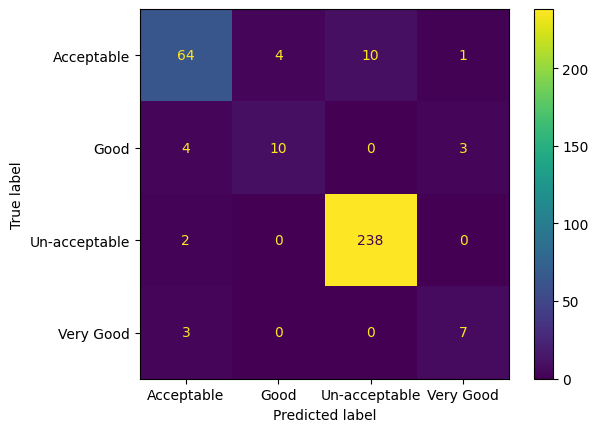

In [ ]:
perform(y_pred_svc)

In [ ]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

**K NEAREST NEIGHBOUR**

In [ ]:
model1=KNeighborsClassifier()

grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7240445673117198
{'n_neighbors': 22}


In [ ]:
k=22
knn_classifier=KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(x_train,y_train)

y_pred=knn_classifier.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7745664739884393

Precision :  0.7745664739884393
Recall:  0.7745664739884393
Accuracy :  0.7745664739884393
              precision    recall  f1-score   support

           0       0.76      0.33      0.46        79
           1       0.00      0.00      0.00        17
           2       0.77      1.00      0.87       240
           3       1.00      0.30      0.46        10

    accuracy                           0.77       346
   macro avg       0.63      0.41      0.45       346
weighted avg       0.74      0.77      0.72       346



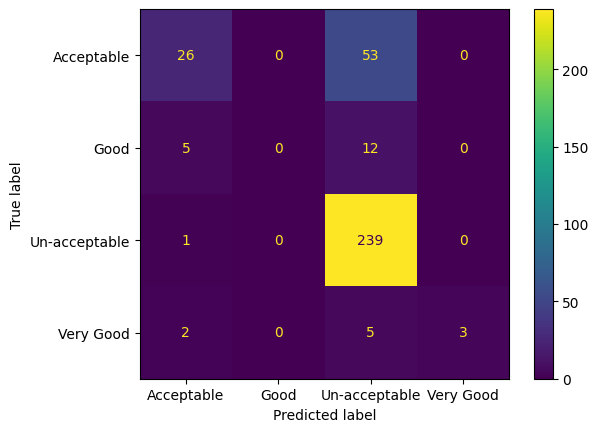

In [ ]:
perform(y_pred)